In [5]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


In [6]:
iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target


In [7]:
# Split the data into train and test sets
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [8]:
recall, precision, f1 = [], [], []

for max_depth in range(1, 6):  
    clf = DecisionTreeClassifier(min_samples_split=5, min_samples_leaf=2, max_depth=max_depth) 
    clf.fit(X_train, y_train)  # 训练决策树模型
    y_pre = clf.predict(X_test)  # 使用测试集进行预测
    C_report = classification_report(y_test, y_pre, output_dict=True)  
    
    recall.append(C_report['accuracy'])  # 记录准确率
    precision.append(C_report['weighted avg']['precision'])  
    f1.append(C_report['weighted avg']['f1-score'])  


D:\dev\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\dev\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\dev\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


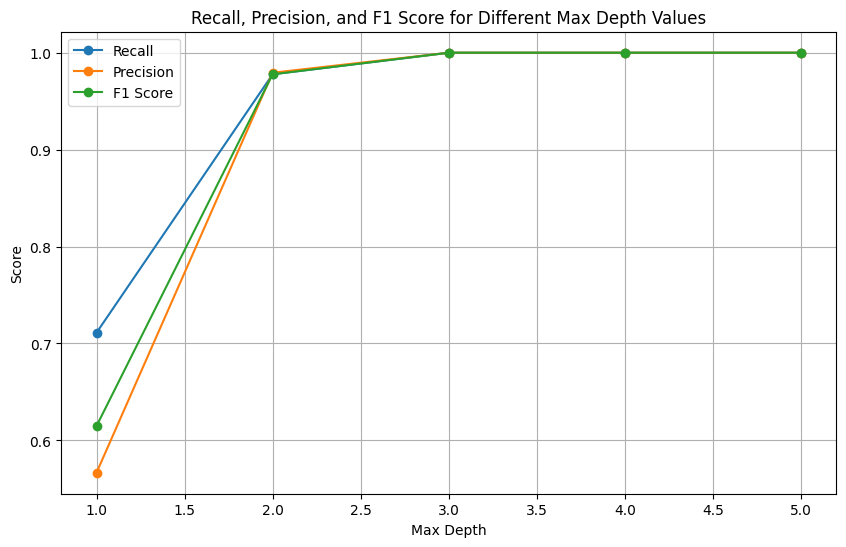

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), recall, label="Recall", marker='o')
plt.plot(range(1, 6), precision, label="Precision", marker='o')
plt.plot(range(1, 6), f1, label="F1 Score", marker='o')
plt.xlabel("Max Depth")
plt.ylabel("Score")
plt.title("Recall, Precision, and F1 Score for Different Max Depth Values")
plt.legend()
plt.grid(True)
plt.show()
